## Análise de Dados dos Crimes Contra a Mulher em Belém

### 1. Seleção e tratamento de dados

In [1004]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1005]:
df = pd.read_csv(r"C:\\Users\\carlo\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [1006]:
pd.set_option('display.max_columns', None)
df.head()

nro_bop nro_bop_aditado       nro_tombo      tipo_tombo  \
0  277/2019.255548-2             /.-  NAO INSTAURADO  NAO INSTAURADO   
1  277/2019.257206-7             /.-  NAO INSTAURADO  NAO INSTAURADO   
2  277/2019.161968-6             /.-  NAO INSTAURADO  NAO INSTAURADO   
3  277/2019.162974-0             /.-  NAO INSTAURADO  NAO INSTAURADO   
4  277/2019.166170-0             /.-  NAO INSTAURADO  NAO INSTAURADO   

      unidade_origem                            unidade_responsavel  \
0  DEL.VIRTUAL - 277      SAO FELIX DO XINGU - UNIDADE POLICIAL 212   
1  DEL.VIRTUAL - 277  MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP   
2  DEL.VIRTUAL - 277                           TUCURUI - PESSOA 454   
3  DEL.VIRTUAL - 277      GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP   
4  DEL.VIRTUAL - 277                 PARAUAPEBAS - 20ª SECCIONAL 71   

  data_registro        hora_registro   data_fato dia_semana  \
0    2019-12-12  1970-01-01 14:43:00  2019-12-11        QUA   
1    2019-12-16  1970-01-01 10:38:00  2019-12-10        TER   
2    2019-08-10  1970-01-01 10:55:00  2019-08-06        TER   
3    2019-08-12  1970-01-01 13:00:00  2019-08-10        SAB   
4    2019-08-16  1970-01-01 13:12:00  2019-07-23        TER   

             hora_fato   fx_4_hor   fx_12_hr data_inst_proc data_concl_proc  \
0  1970-01-01 15:30:00  12 |-- 18  14 |-- 16     1900-09-09      1900-09-09   
1  1970-01-01 15:00:00  12 |-- 18  14 |-- 16     1900-09-09      1900-09-09   
2  1970-01-01 13:30:00  12 |-- 18  12 |-- 14     1900-09-09      1900-09-09   
3  1970-01-01 19:30:00  18 |-- 24  18 |-- 20     1900-09-09      1900-09-09   
4  1970-01-01 22:00:00  18 |-- 24  22 |-- 24     1900-09-09      1900-09-09   

         sit_proc                         classe_motivo mes_registro  \
0  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO     DEZEMBRO   
1  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO     DEZEMBRO   
2  NAO INSTAURADO  REGISTROS QUE NAO GERAM PROCEDIMENTO       AGOSTO   
3  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO       AGOSTO   
4  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO       AGOSTO   

   mes_fato  ano_registro  ano_fato             registros       consolidado  \
0  DEZEMBRO          2019      2019       ART.155 - FURTO             FURTO   
1  DEZEMBRO          2019      2019       ART.155 - FURTO             FURTO   
2    AGOSTO          2019      2019  DANO CULPOSO (CIVIL)  DANO NO TRANSITO   
3    AGOSTO          2019      2019       ART.155 - FURTO             FURTO   
4     JULHO          2019      2019       ART.155 - FURTO             FURTO   

  fato_real especificacao_crime meio_emp_deac latitude longitude  \
0       NaN                 NaN           NaN      NaN       NaN   
1       NaN                 NaN           NaN      NaN       NaN   
2       NaN                 NaN           NaN      NaN       NaN   
3       NaN                 NaN           NaN      NaN       NaN   
4       NaN                 NaN           NaN      NaN       NaN   

                        causa_presumivel      especializacao_fato  \
0  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
1  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
2  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA       DELITO DE TRANSITO   
3  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
4  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   

            grupo_ocorrencia                              sub_grupo  \
0  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
1  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
2  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
3  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
4  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   

  meio_empregado_sisp            distrito          municipios  \
0     SEM INSTRUMENTO  SAO FELIX DO XINGU  SAO FELIX DO XINGU   
1     SEM 

#### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'data_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
 - Dados das vitimas:
   - 'aut_sexo'



In [1007]:
crimes_df=df[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','mes_fato',
                    'ano_fato','data_fato','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','municipios','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento', 'aut_sexo']]

##### Filtros para crimes que ocorreram somente na capital Belém

In [1008]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

In [1009]:
crimes_df

unidade_origem  \
0                                  DEL.VIRTUAL - 277   
1                                  DEL.VIRTUAL - 277   
2                                  DEL.VIRTUAL - 277   
3       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
4       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
...                                              ...   
564456                                           NaN   
564457                                           NaN   
564458                                           NaN   
564459                                           NaN   
564460                                           NaN   

                                   unidade_responsavel dia_semana   fx_4_hor  \
0        MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        TER  12 |-- 18   
1            GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP        SAB  18 |-- 24   
2       SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP        SAB  12 |-- 18   
3         MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        SEX  00 |-- 06   
4         MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI  18 |-- 24   
...                                                ...        ...        ...   
564456                                             NaN        DOM  06 |-- 12   
564457                                             NaN        DOM  00 |-- 06   
564458                                             NaN        SEX  00 |-- 06   
564459                                             NaN        SEX  00 |-- 06   
564460                                             NaN        TER  06 |-- 12   

         mes_fato  ano_fato            data_fato  \
0        DEZEMBRO      2019           2019-12-10   
1          AGOSTO      2019           2019-08-10   
2          AGOSTO      2019           2019-08-17   
3        NOVEMBRO      2019           2019-11-01   
4        NOVEMBRO      2019           2019-11-28   
...           ...       ...                  ...   
564456  FEVEREIRO      2022  2022-02-13 00:00:00   
564457  FEVEREIRO      2022  2022-02-13 00:00:00   
564458  FEVEREIRO      2022  2022-02-11 00:00:00   
564459  FEVEREIRO      2022  2022-02-11 00:00:00   
564460  FEVEREIRO      2022  2022-02-08 00:00:00   

                               consolidado especificacao_crime  \
0                                    FURTO                 NaN   
1                                    FURTO                 NaN   
2                                    FURTO                 NaN   
3                        TRAFICO DE DROGAS                 NaN   
4                                 DESACATO                 NaN   
...                                    ...                 ...   
564456                              AMEACA                 NaN   
564457  INVASAO DE DISPOSITIVO INFORMATICO                 NaN   
564458  INVASAO DE DISPOSITIVO INFORMATICO                 NaN   
564459     ACIDENTE DE TRANSITO SEM VITIMA                 NaN   
564460                         ESTELIONATO                 NaN   

                             causa_presumivel meio_empregado_sisp  \
0       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
1       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
2       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
3                               ENTORPECENTES        OUTROS MEIOS   
4                                  DEVASSIDAO        OUTROS MEIOS   
...                                       ...                 ...   
564456                                 OUTRAS     SEM INSTRUMENTO   
564457                                 OUTRAS        OUTROS MEIOS   
564458                                 OUTRAS        OUTROS MEIOS   
564459                                 OUTRAS        OUTROS MEIOS   
564460                                 OUTRAS     SEM INSTRUMENTO   

                  bairros                local_ocorrencia  vit_idade  \
0              MANGUEIRAO                     VIA PUBLICA       50.0   
1            

#### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [1010]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564461 entries, 0 to 564460
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          285383 non-null  object 
 1   unidade_responsavel     285383 non-null  object 
 2   dia_semana              564461 non-null  object 
 3   fx_4_hor                564461 non-null  object 
 4   mes_fato                564461 non-null  object 
 5   ano_fato                564461 non-null  int64  
 6   data_fato               564461 non-null  object 
 7   consolidado             564458 non-null  object 
 8   especificacao_crime     245928 non-null  object 
 9   causa_presumivel        564458 non-null  object 
 10  meio_empregado_sisp     564423 non-null  object 
 11  bairros                 564461 non-null  object 
 12  local_ocorrencia        564452 non-null  object 
 13  vit_idade               564191 non-null  float64
 14  vit_fx_etaria       

In [1011]:
crimes_df.isnull().sum()

unidade_origem            279078
unidade_responsavel       279078
dia_semana                     0
fx_4_hor                       0
mes_fato                       0
ano_fato                       0
data_fato                      0
consolidado                    3
especificacao_crime       318533
causa_presumivel               3
meio_empregado_sisp           38
bairros                        0
local_ocorrencia               9
vit_idade                    270
vit_fx_etaria                140
vit_sexo                      29
vit_cor_pele              187847
vit_grau_inst             130738
grau_de_relacionamento    481397
aut_sexo                   73589
dtype: int64

In [1012]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

dtypes  Absoluto  Porcentagem
grau_de_relacionamento   object    481397    85.284369
especificacao_crime      object    318533    56.431357
unidade_origem           object    279078    49.441503
unidade_responsavel      object    279078    49.441503
vit_cor_pele             object    187847    33.279004
vit_grau_inst            object    130738    23.161565
aut_sexo                 object     73589    13.037039
vit_idade               float64       270     0.047833
vit_fx_etaria            object       140     0.024802
meio_empregado_sisp      object        38     0.006732
vit_sexo                 object        29     0.005138
local_ocorrencia         object         9     0.001594
consolidado              object         3     0.000531
causa_presumivel         object         3     0.000531

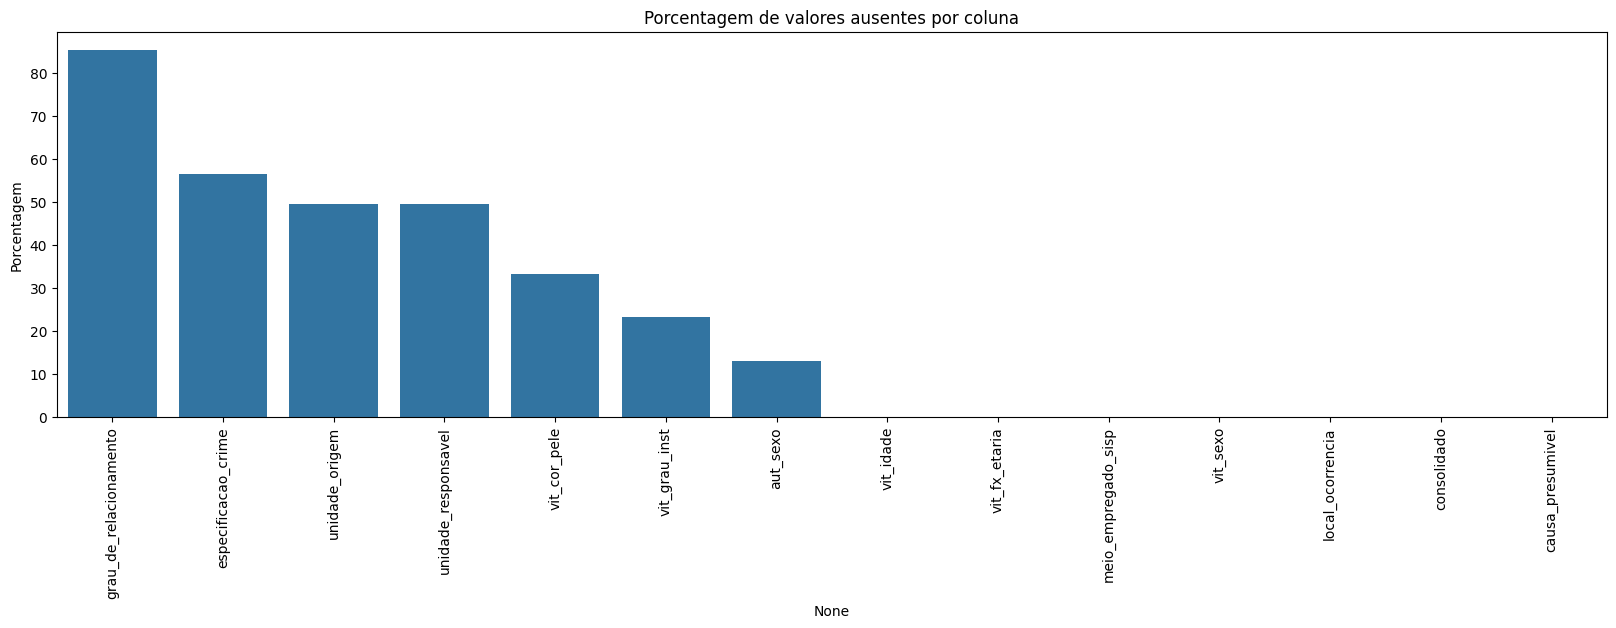

In [1013]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia", "consolidado", "causa_presumivel", "vit_sexo" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes. As colunas vit_idade e vit_fx_etaria serão usadas posteriormente para tratamento da coluna vit_fx_etaria, portanto não é interessante a remoção de linhas nesta etapa.

In [1014]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "consolidado", "causa_presumivel", "vit_sexo"], inplace=True)

In [1015]:
crimes_df.reset_index(drop=True, inplace=True)


In [1016]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

dtypes  Absoluto  Porcentagem
grau_de_relacionamento   object    481340    85.286358
especificacao_crime      object    318509    56.435103
unidade_origem           object    279064    49.446030
unidade_responsavel      object    279064    49.446030
vit_cor_pele             object    187800    33.275394
vit_grau_inst            object    130685    23.155457
aut_sexo                 object     73581    13.037469
vit_idade               float64       243     0.043056
vit_fx_etaria            object       115     0.020376

### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [1017]:
colunas_com_NaN = ["grau_de_relacionamento","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","vit_grau_inst",
                   "aut_sexo","vit_idade","vit_fx_etaria"]
crimes_df.loc[:, colunas_com_NaN] = crimes_df.loc[:, colunas_com_NaN].fillna("Nao informado")

In [1018]:
crimes_df.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
mes_fato                  0
ano_fato                  0
data_fato                 0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
grau_de_relacionamento    0
aut_sexo                  0
dtype: int64

### 2. Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

1. Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- vit_sexo

In [1019]:
crimes_df.vit_sexo.value_counts()

vit_sexo
M             286957
F             239338
PJ             25484
JL              8826
NI              2443
P               1205
PARDA            105
JA LANCADO        22
BRANCA             1
Name: count, dtype: int64

In [1020]:
crimes_df[crimes_df['vit_sexo'] == 'BRANCA']

unidade_origem  \
254074  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
254074  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        TER   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
254074  18 |-- 24  JANEIRO      2020  2020-01-14  LESAO CORPORAL   

        especificacao_crime  causa_presumivel meio_empregado_sisp bairros  \
254074  VIOLENCIA DOMESTICA  ODIO OU VINGANCA     SEM INSTRUMENTO   GUAMA   

             local_ocorrencia vit_idade             vit_fx_etaria vit_sexo  \
254074  RESIDENCIA PARTICULAR      37.0  ADULTO IV (35 A 64 ANOS)   BRANCA   

       vit_cor_pele            vit_grau_inst grau_de_relacionamento aut_sexo  
254074            F  ENSINO MEDIO INCOMPLETO          Nao informado        M

Nesta linha da base, é perceptivel o erro na transcrição das informações, visto que a coluna vit_cor_pel e vit_sexo estao com os valores trocados. Como se trata de um caso sobre violencia contra a mulher, será feita a correção.

In [1021]:
condicao_sexo_cor = (crimes_df['vit_sexo'] == 'BRANCA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor, ['vit_sexo', 'vit_cor_pele']] = ['F', 'BRANCA']

In [1022]:
crimes_df[crimes_df['vit_sexo'] == 'PARDA']

unidade_origem  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   
170755        COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP   
170756         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
170759      SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP   
...                                                   ...   
281833   MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP   
284742          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
284817  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
284827  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
285175  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        SAB   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        QUI   
170755        COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP        DOM   
170756         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        DOM   
170759      SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP        QUI   
...                                                   ...        ...   
281833   MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP        SEG   
284742  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...        SEX   
284817  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   
284827  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
285175  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
159996  06 |-- 12  JANEIRO      2020  2020-01-11  LESAO CORPORAL   
160019  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
170755  18 |-- 24  JANEIRO      2020  2020-01-05  LESAO CORPORAL   
170756  12 |-- 18  JANEIRO      2020  2020-01-26  LESAO CORPORAL   
170759  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
...           ...      ...       ...         ...             ...   
281833  06 |-- 12  JANEIRO      2020  2020-01-06  LESAO CORPORAL   
284742  18 |-- 24  JANEIRO      2020  2020-01-31  LESAO CORPORAL   
284817  00 |-- 06  JANEIRO      2020  2020-01-20  LESAO CORPORAL   
284827  00 |-- 06  JANEIRO      2020  2020-01-12  LESAO CORPORAL   
285175  00 |-- 06  JANEIRO      2020  2020-01-27  LESAO CORPORAL   

        especificacao_crime         causa_presumivel meio_empregado_sisp  \
159996  VIOLENCIA DOMESTICA                    CIUME        OUTROS MEIOS   
160019  VIOLENCIA DOMESTICA         ODIO OU VINGANCA        OUTROS MEIOS   
170755  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
170756  VIOLENCIA DOMESTICA  ALCOOLISMO / EMBRIAGUEZ        OUTROS MEIOS   
170759  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
...                     ...                      ...                 ...   
281833  VIOLENCIA DOMESTICA         ODIO OU VINGANCA        OUTROS MEIOS   
284742  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
284817  VIOLENCIA DOMESTICA         ODIO OU VINGANCA     SEM INSTRUMENTO   
284827  VIOLENCIA DOMESTICA                   OUTRAS     SEM INSTRUMENTO   
285175  VIOLENCIA DOMESTICA                   OUTRAS              ONIBUS   

                  bairros        local_ocorrencia vit_idade  \
159996           CREMACAO             VIA PUBLICA      23.0   
160019           PEDREIRA                  PREDIO      22.0   
170755       CIDADE VELHA  CAFE, BAR, RESTAURANTE      31.0   
170756           CREMACAO             VIA PUBLICA      63.0   
170759  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      36.0   
...                   ...                     ...       ...   
281833              MARCO             VIA PUBLICA      52.0   
284742        TERRA FIRME   RESIDENCIA PARTICULAR      17.0   
284817  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      20.0   
284827         SACRAMENTA  CAFE, BAR, RESTAURANTE      23.0   
285175           PRATI

Para tratar melhor as linhas com 'PARDA' na coluna 'vit_sexo', serão excluidos as linhas em que a vitima não é do sexo feminino e os valores 'JL', 'JA LANCADO', 'P', 'NI' E 'PJ'

In [1023]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='PJ'].index, inplace=True)

In [1024]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='M'].index, inplace=True)

In [1025]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='P'].index, inplace=True)

In [1026]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JL'].index, inplace=True)

In [1027]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JA LANCADO'].index, inplace=True)

In [1028]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='NI'].index, inplace=True)

In [1029]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239339
PARDA       105
Name: count, dtype: int64

In [1030]:
crimes_df[(crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')]

unidade_origem  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   
170761  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
170775  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...   
171020  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
...                                                   ...   
278794  TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...   
284742          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
284817  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
284827  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
285175  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        SAB   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        QUI   
170761  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
170775  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...        DOM   
171020  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUA   
...                                                   ...        ...   
278794  TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...        TER   
284742  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...        SEX   
284817  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   
284827  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
285175  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
159996  06 |-- 12  JANEIRO      2020  2020-01-11  LESAO CORPORAL   
160019  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
170761  18 |-- 24  JANEIRO      2020  2020-01-19  LESAO CORPORAL   
170775  00 |-- 06  JANEIRO      2020  2020-01-19  LESAO CORPORAL   
171020  00 |-- 06  JANEIRO      2020  2020-01-01  LESAO CORPORAL   
...           ...      ...       ...         ...             ...   
278794  06 |-- 12  JANEIRO      2020  2020-01-21  LESAO CORPORAL   
284742  18 |-- 24  JANEIRO      2020  2020-01-31  LESAO CORPORAL   
284817  00 |-- 06  JANEIRO      2020  2020-01-20  LESAO CORPORAL   
284827  00 |-- 06  JANEIRO      2020  2020-01-12  LESAO CORPORAL   
285175  00 |-- 06  JANEIRO      2020  2020-01-27  LESAO CORPORAL   

        especificacao_crime  causa_presumivel meio_empregado_sisp  \
159996  VIOLENCIA DOMESTICA             CIUME        OUTROS MEIOS   
160019  VIOLENCIA DOMESTICA  ODIO OU VINGANCA        OUTROS MEIOS   
170761  VIOLENCIA DOMESTICA             CIUME        OUTROS MEIOS   
170775  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
171020  VIOLENCIA DOMESTICA  ODIO OU VINGANCA        OUTROS MEIOS   
...                     ...               ...                 ...   
278794  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
284742  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
284817  VIOLENCIA DOMESTICA  ODIO OU VINGANCA     SEM INSTRUMENTO   
284827  VIOLENCIA DOMESTICA            OUTRAS     SEM INSTRUMENTO   
285175  VIOLENCIA DOMESTICA            OUTRAS              ONIBUS   

                  bairros        local_ocorrencia vit_idade  \
159996           CREMACAO             VIA PUBLICA      23.0   
160019           PEDREIRA                  PREDIO      22.0   
170761        TERRA FIRME   RESIDENCIA PARTICULAR      24.0   
170775           PARACURI   RESIDENCIA PARTICULAR      45.0   
171020         MANGUEIRAO   RESIDENCIA PARTICULAR      48.0   
...                   ...                     ...       ...   
278794             TENONE             VIA PUBLICA      36.0   
284742        TERRA FIRME   RESIDENCIA PARTICULAR      17.0   
284817  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      20.0   
284827         SACRAMENTA  CAFE, BAR, RESTAURANTE      23.0   
285175           PRATINHA   RESIDENCIA PARTICULAR      27.0   

                     vit_fx_etaria vit_sex

In [1031]:
condicao_sexo_cor_1 = (crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PARDA']

O restante são valores que estão preenchidos com 'M' na coluna 'vit_cor_pele', serão excluidos a seguir no tratamento da coluna em questao

In [1032]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239433
PARDA        11
Name: count, dtype: int64

- vit_cor_pele

In [1033]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO        120338
Nao informado       81234
NAO INFORMADO       34469
PARDA                3129
BRANCA                156
PRETA                  88
M                      11
JA LANCADO              7
INDIGENA                7
PJ, EP E OUTROS         4
AMARELA                 1
Name: count, dtype: int64

In [1034]:
crimes_df.loc[crimes_df.vit_cor_pele == "Nao informado",'vit_cor_pele']= 'PREJUDICADO'

In [1035]:
crimes_df.loc[crimes_df.vit_cor_pele == "NAO INFORMADO",'vit_cor_pele']= 'PREJUDICADO'

In [1036]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='M'].index, inplace=True)

In [1037]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='JA LANCADO'].index, inplace=True)

In [1038]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='PJ, EP E OUTROS'].index, inplace=True)

In [1039]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO    236041
PARDA            3129
BRANCA            156
PRETA              88
INDIGENA            7
AMARELA             1
Name: count, dtype: int64

- local_ocorrencia

In [1040]:
local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  194


['VIA PUBLICA',
 'TRANSPORTE',
 'OUTROS',
 'RESIDENCIA PARTICULAR',
 'MAR, RIO, LAGOA',
 'CAFE,BAR,ETC',
 'HOSPITAL',
 'OUTROS ESTADOS',
 'ESTABELECIMENTO BANCARIO',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'LOGRADORO PUBLICO',
 'INTERNET',
 'CASA COMERCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'CONDOMINIO RESIDENCIAL',
 'EDIFICIO PUBLICO',
 'VIA PUBLICA ',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'LOJAS DE CONVENIENCIA',
 'TRANSPORTE ',
 'CASA COMERCIAL ',
 'CAIXA ELETRONICO',
 'LOJA ',
 'LOJA',
 'VIA FERREA',
 'FARMACIA',
 'REDIDENCIA PARTICULAR ',
 'HOTEL, PENSAO, ETC',
 'HABITACAO COLETIVA',
 'SUPERMERCADO',
 'OUTROS PAISES',
 'PENITENCIARIA, REFORMATORIO',
 'PREDIO EM OBRAS',
 'MERCADINHO',
 'LOJA DE CONVENIENCIA ',
 'IGREJA',
 'SALAO DE BELEZA',
 'POSTO DE GASOLINA',
 'CLINICA ',
 'TERRENO BALDIO',
 'COOPERATIVA',
 'CAMPUS UNIVERSITARIO',
 'CRAS',
 'ORGAO PUBLICO',
 'PANIFICADORA',
 'BAR',
 'FARMACIA ',
 'CLUBE',
 'SALAO DE BELEZA ',
 'EMPRESA',
 'CONSULTORIO',
 'TRAN

In [1041]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [1042]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1043]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE URBANO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1044]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1045]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1046]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1047]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPOSTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1048]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1049]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1050]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETVIO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1051]:
crimes_df.loc[crimes_df.local_ocorrencia == "COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1052]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [1053]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [1054]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR,RIO,LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [1055]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO E LAGOA",'local_ocorrencia']= 'MAR, RIO, LAGOA'


In [1056]:
crimes_df.loc[crimes_df.local_ocorrencia == "PORTO",'local_ocorrencia']=  'PORTOS / MARINAS / ATRACADOUROS',

In [1057]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [1058]:
crimes_df.loc[crimes_df.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [1059]:
crimes_df.loc[crimes_df.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [1060]:
crimes_df.loc[crimes_df.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [1061]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESTAURANTE ",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [1062]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOSPITAL ",'local_ocorrencia'] = 'HOSPITAL'

In [1063]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO DE COMERCIAL",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [1064]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [1065]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [1066]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (NTERNET)",'local_ocorrencia'] = 'INTERNET'

In [1067]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (PIX)",'local_ocorrencia'] = 'INTERNET'

In [1068]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL",'local_ocorrencia'] = 'INTERNET'

In [1069]:
crimes_df.loc[crimes_df.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [1070]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'CASA COMERCIAL'

In [1071]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [1072]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO DO JORNAL",'local_ocorrencia'] = 'PREDIO'

In [1073]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO/PALACIO DO RADIO",'local_ocorrencia'] = 'PREDIO'

In [1074]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA ",'local_ocorrencia'] = 'LOJA'

In [1075]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMERICANAS",'local_ocorrencia'] = 'LOJA'

In [1076]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA DE CONVENIENCIA ",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [1077]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [1078]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [1079]:
crimes_df.loc[crimes_df.local_ocorrencia == "FARMACIA ",'local_ocorrencia'] =   'FARMACIA'

In [1080]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [1081]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [1082]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [1083]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [1084]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO LIDER",'local_ocorrencia'] = 'SUPERMERCADO'

In [1085]:
crimes_df.loc[crimes_df.local_ocorrencia == "SALAO DE BELEZA ",'local_ocorrencia'] = 'SALAO DE BELEZA'

In [1086]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE GASOLINA ",'local_ocorrencia'] = 'POSTO DE GASOLINA'

In [1087]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE SAUDE ",'local_ocorrencia'] = 'POSTO DE SAUDE'

In [1088]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [1089]:
crimes_df.loc[crimes_df.local_ocorrencia == "PANIFICADORA ",'local_ocorrencia'] = 'PANIFICADORA'

In [1090]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBE\\r\\n",'local_ocorrencia'] = 'CLUBE'

In [1091]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBES E AGREMIACOES",'local_ocorrencia'] = 'CLUBE'

In [1092]:
crimes_df.loc[crimes_df.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [1093]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO ",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [1094]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO BANCARIO",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [1095]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [1096]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [1097]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTADIO DE FUTEBOL",'local_ocorrencia'] = 'ESTADIO ESPORTIVO'

In [1098]:
crimes_df.loc[crimes_df.local_ocorrencia == "LANCHONETE ",'local_ocorrencia'] =  'LANCHONETE'

In [1099]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING ",'local_ocorrencia'] =  'SHOPPING'

In [1100]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING BOULEVARD",'local_ocorrencia'] =  'SHOPPING'

In [1101]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO ",'local_ocorrencia'] =  'DEPOSITO'

In [1102]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO DE GAS ",'local_ocorrencia'] =  'DEPOSITO'

In [1103]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOCADORA DE AUTOMOVEIS",'local_ocorrencia'] =  'LOCADORA'

In [1104]:
crimes_df.loc[crimes_df.local_ocorrencia == "SINDICATO E ASSOCIACAO DE CLASSE",'local_ocorrencia'] =  'SINDICATO'

In [1105]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [1106]:
crimes_df.loc[crimes_df.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [1107]:
crimes_df.loc[crimes_df.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [1108]:
crimes_df.loc[crimes_df.local_ocorrencia == "ONIBUS",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [1109]:
crimes_df.loc[crimes_df.local_ocorrencia == "CENTRO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [1110]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [1111]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [1112]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOTEL",'local_ocorrencia'] = 'HOTEL, PENSAO, ETC'

In [1113]:
crimes_df.loc[crimes_df.local_ocorrencia == "AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [1114]:
crimes_df.loc[crimes_df.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [1115]:
crimes_df.loc[crimes_df.local_ocorrencia == "OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [1116]:
novo_local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 125


array(['VIA PUBLICA', 'TRANSPORTE', 'OUTROS', 'RESIDENCIA PARTICULAR',
       'MAR, RIO, LAGOA', 'CAFE,BAR,ETC', 'HOSPITAL', 'OUTROS ESTADOS',
       'ESTABELECIMENTO BANCARIO', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'LOGRADORO PUBLICO', 'INTERNET',
       'CASA COMERCIAL', 'CAFE, BAR, RESTAURANTE', 'PREDIO',
       'CONDOMINIO RESIDENCIAL', 'EDIFICIO PUBLICO',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'LOJA DE CONVENIENCIA',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'CAIXA ELETRONICO', 'LOJA',
       'ESTACAO FERROVIARIA', 'FARMACIA', 'REDIDENCIA PARTICULAR ',
       'HOTEL, PENSAO, ETC', 'HABITACAO COLETIVA', 'SUPERMERCADO',
       'OUTROS PAISES', 'PENITENCIARIA, REFORMATORIO', 'MERCADINHO',
       'IGREJA', 'SALAO DE BELEZA', 'POSTO DE GASOLINA', 'CLINICA',
       'TERRENO BALDIO', 'COOPERATIVA', 'CAMPUS UNIVERSITARIO', 'CRAS',
       'ORGAO PUBLICO', 'PANIFICADORA', 'BAR', 'CLUBE', 'EMPRESA',
       'CONSULTORIO', 'ESTABELECIMENTO INDUSTRIAL', 'LOTERICA',
   

- Grau de relacionamento

In [1117]:
grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 62


array(['Nao informado', 'NAO INFORMADO', 'COMPANHEIRO(A)',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)',
       'AVO', 'AMIGO(A)', 'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)',
       'CONHECIDO(A)', 'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE',
       'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO',
       'EX-SOGRO(A)', 'NETO', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'POR AFINIDADE',
       'EX - CUNHADO(A)', 'PRIMA', 'TIO', 'TIO(A', 'EX-AMANTE',
       'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)', 'EX-CUNHADO (A)',
       'JOSIVAN CONCEICAO DOS SANTOS', 'PREJUDUICADO',
       'PARENTESCO POR AFINIDADE ', 'PREJUDICAOD', 'EX COMPANHEIRO',
       'PREJUICADO', 'EX-CUNHDO (A)', 'PAI DO PADRASTO', 'EX-ENTEADO(A)'

In [1118]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [1119]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX COMPANHEIRO",'grau_de_relacionamento'] =  'EX-COMPANHEIRO(A)'

In [1120]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [1121]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [1122]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [1123]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX - CUNHADO(A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [1124]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [1125]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [1126]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHDO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [1127]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [1128]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [1129]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTESCO POR AFINIDADE ",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [1130]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [1131]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [1132]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [1133]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDICAOD",'grau_de_relacionamento'] =  'PREJUDICADO'

In [1134]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [1135]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [1136]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [1137]:
crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"]

unidade_origem unidade_responsavel dia_semana   fx_4_hor mes_fato  \
453653  Nao informado       Nao informado        TER  18 |-- 24    JUNHO   

        ano_fato            data_fato consolidado  especificacao_crime  \
453653      2022  2022-06-14 00:00:00       FURTO  EM COLETIVO/CELULAR   

       causa_presumivel meio_empregado_sisp  bairros local_ocorrencia  \
453653          AMBICAO     SEM INSTRUMENTO  CAMPINA          VEICULO   

       vit_idade            vit_fx_etaria vit_sexo vit_cor_pele  \
453653      22.0  ADULTO I (18 A 24 ANOS)        F  PREJUDICADO   

                vit_grau_inst        grau_de_relacionamento aut_sexo  
453653  ENSINO MEDIO COMPLETO  JOSIVAN CONCEICAO DOS SANTOS        M

Como o crime consolidado não corresponde de fato a um crime contra a mulher, esta linha será excluida

In [1138]:
crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)

In [1139]:
crimes_df.reset_index(drop=True, inplace=True)

In [1140]:
crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS']

unidade_origem  \
73924        MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
74996       SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP   
82426                                   DEL.VIRTUAL - 277   
104604  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...   
104607  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...   
107971                              DIVISAO DE HOMICIDIOS   
108605  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...   
110942  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...   
117531          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
118437                                  DEL.VIRTUAL - 277   
124749                                      Nao informado   
152862                                      Nao informado   
181318                                      Nao informado   

                                      unidade_responsavel dia_semana  \
73924        MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI   
74996       SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP        SAB   
82426         BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP        SAB   
104604  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...        SEG   
104607  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...        SEG   
107971                              DIVISAO DE HOMICIDIOS        SEX   
108605  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        QUI   
110942  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        QUI   
117531          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP        QUI   
118437        BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP        TER   
124749                                      Nao informado        TER   
152862                                      Nao informado        SEG   
181318                                      Nao informado        QUA   

         fx_4_hor   mes_fato  ano_fato   data_fato  \
73924   12 |-- 18   NOVEMBRO      2020  2020-11-05   
74996   12 |-- 18   DEZEMBRO      2020  2020-12-19   
82426   18 |-- 24     AGOSTO      2020  2020-08-29   
104604  18 |-- 24     AGOSTO      2020  2020-08-24   
104607  18 |-- 24     AGOSTO      2020  2020-08-24   
107971  06 |-- 12   DEZEMBRO      2020  2020-12-04   
108605  12 |-- 18     AGOSTO      2020  2020-08-20   
110942  12 |-- 18     AGOSTO      2020  2020-08-20   
117531  18 |-- 24    OUTUBRO      2020  2020-10-15   
118437  12 |-- 18   SETEMBRO      2020  2020-09-08   
124749  06 |-- 12      MARCO      2021  2021-03-23   
152862  12 |-- 18      ABRIL      2021  2021-04-05   
181318  00 |-- 06  FEVEREIRO      2021  2021-02-03   

                                              consolidado  \
73924                                   HOMICIDIO CULPOSO   
74996   LESAO DECORRENTE DE INTERVENCAO DE AGENTE DO E...   
82426                                PARA FINS DE DIREITO   
104604                      PERTURBACAO DO SOSSEGO ALHEIO   
104607                      PERTURBACAO DO SOSSEGO ALHEIO   
107971                   APRESENTACAO - MANDADO DE PRISAO   
108605                                        ESTELIONATO   
110942                                        ESTELIONATO   
117531                                 OMISSAO DE SOCORRO   
118437                                        ESTELIONATO   
124749                                     LESAO CORPORAL   
152862                               FALSIDADE IDEOLOGICA   
181318                                     LESAO CORPORAL   

         especificacao_crime                       causa_presumivel  \
73924            ERRO MEDICO                                 OUTRAS   
74996   INTERVENCAO POLICIAL                                 OUTRAS   
82426    CONTRA O CONSUMIDOR  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
104604         NAO INFORMADO                                 OUTRAS   
104607         NAO INFORMADO                                 OUTRAS   
107971         Nao informado                                 OUTRAS   
108605       MEDIANTE FRAUDE                                AMBICAO   

As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [1141]:
crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [1142]:
novo_grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)', 'CONHECIDO(A)',
       'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE', 'GENRO',
       'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'ENTEADO(A)',
       'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO', 'EX-SOGRO(A)',
       'MADRINHA', 'CHEFE', 'PROFESSOR(A)', 'EX-AMANTE',
       'PAI DO PADRASTO', 'EX-ENTEADO(A)'], dtype=object)

- vit_fx_etaria	

In [1143]:
vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 12


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113154
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28390
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15377
PREJUDICADO                    13554
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3131
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   59
Nao informado                     37
IDOSO(A)                           2
Name: count, dtype: int64

In [1144]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS']

unidade_origem  \
118864                                  DEL.VIRTUAL - 277   
121177  DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP   
203868                                      Nao informado   
203975                                      Nao informado   
203976                                      Nao informado   
203977                                      Nao informado   
203978                                      Nao informado   
203979                                      Nao informado   
203980                                      Nao informado   
203981                                      Nao informado   
203982                                      Nao informado   
203983                                      Nao informado   
203984                                      Nao informado   
203985                                      Nao informado   
203986                                      Nao informado   
203987                                      Nao informado   
203988                                      Nao informado   
203989                                      Nao informado   
203990                                      Nao informado   
203991                                      Nao informado   
203992                                      Nao informado   
203993                                      Nao informado   
203994                                      Nao informado   
203995                                      Nao informado   
203996                                      Nao informado   
203997                                      Nao informado   
203998                                      Nao informado   
203999                                      Nao informado   
204000                                      Nao informado   
204001                                      Nao informado   
204002                                      Nao informado   
204003                                      Nao informado   
204004                                      Nao informado   
204005                                      Nao informado   
204006                                      Nao informado   
204007                                      Nao informado   
204008                                      Nao informado   
204009                                      Nao informado   
204010                                      Nao informado   
204011                                      Nao informado   
208129                                      Nao informado   
212983                                      Nao informado   
214944                                      Nao informado   
214965                                      Nao informado   
214967                                      Nao informado   
214968                                      Nao informado   
214969                                      Nao informado   
214970                                      Nao informado   
214971                                      Nao informado   
214972                                      Nao informado   
214973                                      Nao informado   
214974                                      Nao informado   
214975                                      Nao informado   
233297                                      Nao informado   
233299                                      Nao informado   
233300                                      Nao informado   
233301                                      Nao informado   
233302                                      Nao informado   
233303                                      Nao informado   

                                      unidade_responsavel dia_semana  \
118864          CABANAGEM- UNID.POL.292-1º RISP- 10ª AISP        QUA   
121177  DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP        SEG   
203868                                      Nao informado        DOM   
203975                                      Nao informado        DOM   
203976                

In [1145]:
filtro_vit_fx_etaria = (crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS')
filtrado_vit_fx_etaria = crimes_df[filtro_vit_fx_etaria] 
tipos_consolidado = filtrado_vit_fx_etaria['consolidado'].value_counts()

In [1146]:
tipos_consolidado

consolidado
AMEACA                                11
ROUBO                                  7
ESTELIONATO                            7
FALSA IDENTIDADE                       5
ACIDENTE DE TRANSITO SEM VITIMA        5
INVASAO DE DISPOSITIVO INFORMATICO     5
INJURIA                                5
PARA FINS DE DIREITO                   3
FURTO                                  2
RECUPERACAO DE VEICULOS                1
PESSOA ENCONTRADA                      1
DANO CIVIL                             1
ACIDENTE FORTUITO COM LESAO            1
FALSIDADE IDEOLOGICA                   1
ESTUPRO                                1
COMUNICACAO DE OBITO                   1
LESAO CORPORAL                         1
MAUS TRATOS                            1
Name: count, dtype: int64

Agora poderemos separar apenas crimes que podem ser considerados crimes contra a mulher.


In [1147]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS') & (crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [1148]:
crimes_df.loc[crimes_df.vit_fx_etaria == "IDOSO(A)",'vit_fx_etaria'] = 'IDOSO (65 ANOS OU MAIS)'

In [1149]:
crimes_df.loc[crimes_df.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [1150]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PREJUDICADO']

unidade_origem  \
3                                       DEL.VIRTUAL - 277   
4                                       DEL.VIRTUAL - 277   
5                                       DEL.VIRTUAL - 277   
6                                       DEL.VIRTUAL - 277   
11      GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 1...   
...                                                   ...   
238840                                      Nao informado   
238915                                      Nao informado   
238917                                      Nao informado   
239308                                      Nao informado   
239311                                      Nao informado   

                                  unidade_responsavel dia_semana   fx_4_hor  \
3                      MARCO - UNID.POL. 14 - 1º RISP        DOM  18 |-- 24   
4       MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        QUA  06 |-- 12   
5       MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        SEX  12 |-- 18   
6        SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP        QUA  12 |-- 18   
11       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI  12 |-- 18   
...                                               ...        ...        ...   
238840                                  Nao informado        SEX  18 |-- 24   
238915                                  Nao informado        DOM  18 |-- 24   
238917                                  Nao informado        SEX  12 |-- 18   
239308                                  Nao informado        SEG  06 |-- 12   
239311                                  Nao informado        SEG  12 |-- 18   

       mes_fato  ano_fato            data_fato           consolidado  \
3         ABRIL      2019           2019-04-14                 ROUBO   
4         ABRIL      2019           2019-04-24                 ROUBO   
5         JUNHO      2019           2019-06-07                 ROUBO   
6         JUNHO      2019           2019-06-19                 ROUBO   
11         MAIO      2019           2019-05-02                 ROUBO   
...         ...       ...                  ...                   ...   
238840    ABRIL      2022  2022-04-22 00:00:00                 ROUBO   
238915     MAIO      2022  2022-05-08 00:00:00     LESAO NO TRANSITO   
238917     MAIO      2022  2022-05-06 00:00:00  COMUNICACAO DE OBITO   
239308     MAIO      2022  2022-05-09 00:00:00     LESAO NO TRANSITO   
239311     MAIO      2022  2022-05-09 00:00:00                AMEACA   

       especificacao_crime                       causa_presumivel  \
3               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
4       TRANSEUNTE/CELULAR  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
5               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
6               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
11      TRANSEUNTE/CELULAR                                AMBICAO   
...                    ...                                    ...   
238840          TRANSEUNTE                                 OUTRAS   
238915             COLISAO                                 OUTRAS   
238917       MORTE NATURAL                                 OUTRAS   
239308             COLISAO                                 OUTRAS   
239311       Nao informado                                 OUTRAS   

       meio_empregado_sisp         bairros       local_ocorrencia vit_idade  \
3             ARMA DE FOGO           MARCO            VIA PUBLICA   66666.0   
4          SEM INSTRUMENTO       MARAMBAIA            VIA PUBLICA   66666.0   
5          SEM INSTRUMENTO       MARAMBAIA            VIA PUBLICA   66666.0   
6          SEM INSTRUMENTO          NAZARE            VIA PUBLICA   66666.0   
11            ARMA DE FOGO     CASTANHEIRA            VIA PUBLICA   66666.0   
...                    ...             ...                    ...       ...   
238840        OUTROS MEIOS      MANGUEIRAO            VIA PUBLICA   66666.0   
238915              ONIBUS        M

In [1151]:
filtro_vit_fx_etaria_1 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_df[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [1152]:
idade_vit

vit_idade
66666.0          12524
99999.0            978
Nao informado       33
118.0               12
36.0                 2
41.0                 2
32.0                 1
37.0                 1
88888.0              1
Name: count, dtype: int64

In [1153]:
crimes_df[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0)]

unidade_origem  \
31891  DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
39376     PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   

                                unidade_responsavel dia_semana   fx_4_hor  \
31891   COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP        SEG  06 |-- 12   
39376  PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        DOM  12 |-- 18   

      mes_fato  ano_fato   data_fato     consolidado  \
31891  OUTUBRO      2019  2019-10-28  LESAO CORPORAL   
39376   AGOSTO      2019  2019-08-25  LESAO CORPORAL   

                      especificacao_crime  causa_presumivel  \
31891  VIOLENCIA DOMESTICA/MARIA DA PENHA  ODIO OU VINGANCA   
39376  VIOLENCIA DOMESTICA/MARIA DA PENHA            OUTRAS   

      meio_empregado_sisp   bairros       local_ocorrencia vit_idade  \
31891        OUTROS MEIOS  UMARIZAL  RESIDENCIA PARTICULAR      36.0   
39376        OUTROS MEIOS  PEDREIRA  RESIDENCIA PARTICULAR      36.0   

      vit_fx_etaria vit_sexo vit_cor_pele  vit_grau_inst  \
31891   PREJUDICADO        F        PARDA  NAO INFORMADO   
39376   PREJUDICADO        F        PARDA  NAO INFORMADO   

      grau_de_relacionamento aut_sexo  
31891               FILHO(A)        F  
39376               IRMAO(A)        M

In [1154]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [1155]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [1156]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [1157]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [1158]:
crimes_df = crimes_df.drop(columns=['vit_idade'])
crimes_df.reset_index(drop=True, inplace=True)

In [1159]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 10


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113159
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28391
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15379
PREJUDICADO                    13548
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   25
Name: count, dtype: int64

In [1160]:
filtro_vit_fx_etaria_2 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_2 = crimes_df[filtro_vit_fx_etaria_2]
tipos_consolidado_1 = filtrado_vit_fx_etaria_2['consolidado'].unique()
tipos_consolidado_1

array(['ROUBO', 'FURTO', 'PARA FINS DE DIREITO', 'LESAO NO TRANSITO',
       'HOMICIDIO', 'ROUBO DE VEICULO', 'APRESENTACAO SUSPEITO DE ROUBO',
       'DANO NO TRANSITO', 'APREENSAO DE OBJETOS', 'AMEACA',
       'LESAO CORPORAL', 'DANO', 'DESAPARECIMENTO DE PESSOA',
       'MORTE A ESCLARECER', 'COMUNICACAO DE OBITO',
       'RECUPERACAO DE VEICULOS', 'ACIDENTE FORTUITO COM DANO',
       'PARA FINS DE PROCEDIMENTO', 'POLUICAO SONORA',
       'AFOGAMENTO COM MORTE', 'JA LANCADO', 'HOMICIDIO CULPOSO',
       'ESTUPRO', 'PRODUZIR,REPRODUZIR,DIRIGIR,FOTOGRAFAR,FILMAR',
       'EXTORSAO', 'ESBULHO POSSESSORIO',
       'CUMPRIMENTO DE MANDADO DE BUSCA E APREENSAO',
       'ACIDENTE DE TRABALHO COM LESAO', 'IMPORTUNACAO SEXUAL',
       'PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO', 'OUTRAS FRAUDES',
       'ABORTO PROVOCADO PELA GESTANTE OU COM O SEU CONSENTIMENTO',
       'PERIGO DE CONTAGIO DE MOLESTIA GRAVE', 'ESTELIONATO',
       'SE O CRIME FOR PRATICADO CONTRA PESSOA COM DEFICIENCIA M

In [1161]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria']== 'PREJUDICADO') & ~(crimes_df['consolidado'].isin(['LESAO CORPORAL', 'AMEACA', 'CONFLITOS FAMILIARES', 'ESTUPRO DE VULNERAVEL', 'TENTATIVA DE HOMICIDIO', 'MAUS TRATOS', 'LESAO CORPORAL CULPOSA', 'IMPORTUNACAO SEXUAL', 'ESTUPRO', 'INJURIA', 'VIAS DE FATO', 'HOMICIDIO', 'CONSTRANGIMENTO ILEGAL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL', 'HOMICIDIO CULPOSO', 'DIFAMACAO', 'TENTATIVA DE ESTUPRO', 'ASSEDIO SEXUAL', 'INVASAO DE DISPOSITIVO INFORMATICO', 'ASSEDIO MORAL', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

Como os valores 'PJ, EP E OUTROS', 'JA LANCADO' e  não são interessantes para a analise serão escluidos

In [1162]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='JA LANCADO'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [1163]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [1164]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 9


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113159
ADULTO I (18 A 24 ANOS)        33134
ADULTO III (30 A 34 ANOS)      28391
ADULTO II (25 A 29 ANOS)       27888
IDOSO (65 ANOS OU MAIS)        15379
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1458
PREJUDICADO                      380
Name: count, dtype: int64

- meio_empregado_sisp

In [1165]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                   104813
OUTROS MEIOS                      103273
ARMA DE FOGO                        8516
ARMA CORTANTE OU PERFURANTE         2261
AUTOMOVEL DE PASSEIO                2174
ARMA CONTUNDENTE                    1348
MOTOCICLETA                         1270
ARMA PERFURO CORTANTE               1053
ONIBUS                               533
AUTOMOVEL COMERCIAL                  311
BICICLETA                            238
CAMINHAO                             135
FOGO                                  86
NAO INFORMADO                         41
OUTROS                                29
VENENO - OUTROS TIPOS                 28
WHATSAPP                              28
VENENO - CHUMBINHO                    12
FACEBOOK                              12
INSTAGRAM                              8
AUTOMÓVEL DE PASSEIO                   6
TWITTER                                3
AUTOMÓVEL COMERCIAL                    2
ARMA PERFURO CORTANTE_X000D_\n       

In [1166]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "ARMA PERFURO CORTANTE_X000D_\n",'meio_empregado_sisp'] = 'ARMA PERFURO CORTANTE'

In [1167]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "AUTOMÓVEL COMERCIAL",'meio_empregado_sisp'] = 'AUTOMOVEL COMERCIAL'


In [1168]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [1169]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                104813
OUTROS MEIOS                   103302
ARMA DE FOGO                     8516
ARMA CORTANTE OU PERFURANTE      2261
AUTOMOVEL DE PASSEIO             2174
ARMA CONTUNDENTE                 1348
MOTOCICLETA                      1270
ARMA PERFURO CORTANTE            1054
ONIBUS                            533
AUTOMOVEL COMERCIAL               313
BICICLETA                         238
CAMINHAO                          135
FOGO                               86
NAO INFORMADO                      41
VENENO - OUTROS TIPOS              28
WHATSAPP                           28
VENENO - CHUMBINHO                 12
FACEBOOK                           12
INSTAGRAM                           8
AUTOMÓVEL DE PASSEIO                6
TWITTER                             3
Name: count, dtype: int64

- causa_presumivel

In [1170]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119567
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     42777
AMBICAO                                   32829
ODIO OU VINGANCA                          22307
CIUME                                      2268
DEVASSIDAO                                 2048
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENACAO                                   333
AMBIÇÃO                                      82
AMBICÃO                                      74
LGBTFOBIA                                    61
ÓDIO OU VINGANÇA                             58
ÓDIO OU VINGANCA                             50
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA        22
CIÚME                                        11
DEVASSIDÃO                                   10
ALIENAÇÃO                                     2
ROUBO                                         1
ALIENACÃO              

In [1171]:
crimes_df.loc[crimes_df.causa_presumivel == "IMPERICIA / IMPRUDENCIA / NEGLIGENCIA",'causa_presumivel'] = 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'

In [1172]:
crimes_df.loc[crimes_df.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [1173]:
crimes_df.loc[crimes_df.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [1174]:
crimes_df.loc[crimes_df.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [1175]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACAO",'causa_presumivel'] = 'ALIENAÇÃO'

In [1176]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACÃO",'causa_presumivel'] = 'ALIENAÇÃO'

In [1177]:
crimes_df.loc[crimes_df.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [1178]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119567
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     42799
AMBICAO                                   32829
ODIO OU VINGANCA                          22307
CIÚME                                      2279
DEVASSIDÃO                                 2058
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENAÇÃO                                   336
AMBIÇÃO                                     156
ÓDIO OU VINGANÇA                            108
LGBTFOBIA                                    61
ROUBO                                         1
PREJUDICADO                                   1
Name: count, dtype: int64

- fx_4_hor

In [1179]:
crimes_df.fx_4_hor.value_counts()

fx_4_hor
06 |-- 12    76425
12 |-- 18    73875
18 |-- 24    57827
00 |-- 06    18054
Name: count, dtype: int64

- bairros

In [1180]:
bairros_unico = crimes_df["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico))
crimes_df["bairros"].unique()

Numero unico em bairros: 100


array(['MANGUEIRAO', 'GUAMA', 'TELEGRAFO SEM FIO', 'SOUZA',
       'PONTA GROSSA', 'PEDREIRA', 'MARCO', 'CASTANHEIRA',
       'CAMPINA DE ICOARACI', 'CAMPINA', 'BRASILIA', 'TERRA FIRME',
       'CHAPEU VIRADO', 'JURUNAS', 'MARACACUERA', 'CONDOR',
       'COQUEIRO BELEM', 'NAZARE', 'CURIO-UTINGA', 'SAO BRAS',
       'CABANAGEM', 'SAO JOAO DO OUTEIRO', 'REDUTO', 'AGULHA',
       'MARAMBAIA', 'TAPANA', 'UMARIZAL', 'SACRAMENTA', 'PARQUE VERDE',
       'CIDADE VELHA', 'ARIRAMBA', 'CRUZEIRO', 'TENONE', 'VAL-DE-CANS',
       'BARREIRO', 'PRATINHA', 'BENGUI', 'MARACANGALHA', 'CREMACAO',
       'AGUAS NEGRAS', 'BATISTA CAMPOS', 'VILA', 'AGUA BOA', 'PARACURI',
       'PARQUE GUAJARA', 'BAIA DO SOL', 'FATIMA', 'CANUDOS', 'UNA',
       'COTIJUBA', 'ITAITEUA', 'MARACAJA', 'CARANANDUBA', 'AEROPORTO',
       'SAO CLEMENTE', 'PORTO ARTHUR', 'FAROL', 'MURUBIRA',
       'SAO FRANCISCO', 'MANGUEIRAS', 'MIRAMAR', 'CRUZEIRO ',
       'PRAIA GRANDE', 'ILHAS DO ARQUIPELAGO DO RIO GUAMA', 'PARAISO',
       'N

In [1181]:
crimes_df.loc[crimes_df.bairros == "BAIA DO SOL ",'bairros'] = 'BAIA DO SOL'

In [1182]:
crimes_df.loc[crimes_df.bairros == "CARANANDUBA ",'bairros'] = 'CARANANDUBA'

In [1183]:
crimes_df.loc[crimes_df.bairros == "ITAITEUA ",'bairros'] = 'ITAITEUA'

In [1184]:
crimes_df.loc[crimes_df.bairros == "CRUZEIRO ",'bairros'] = 'CRUZEIRO'

In [1185]:
crimes_df.loc[crimes_df.bairros == "ILHAS MENORES DE OUTEIRO",'bairros'] = 'SAO JOAO DO OUTEIRO'

In [1186]:
crimes_df.loc[crimes_df.bairros == "TELEGRAFO SEM FIO",'bairros'] = 'TELEGRAFO'

In [1187]:
crimes_df.loc[crimes_df.bairros == "VAL-DE-CANS",'bairros'] = 'VAL-DE-CAES'

In [1188]:
crimes_df.loc[crimes_df.bairros == "ILHA DO CUMBU",'bairros'] = 'ILHA DO COMBU'

In [1189]:
crimes_df.loc[crimes_df.bairros == "INFRAERO",'bairros'] = 'VAL-DE-CAES'

In [1190]:
crimes_df.loc[crimes_df.bairros == "ZONA RURAL DE MOSQUEIRO",'bairros'] = 'ILHA DO MOSQUEIRO'

In [1191]:
crimes_df.loc[crimes_df.bairros == "COQUEIRO BELEM",'bairros'] = 'COQUEIRO'

In [1192]:
crimes_df.loc[crimes_df.bairros == "PONTA GROSSA ",'bairros'] = 'PONTA GROSSA'

In [1193]:
crimes_df.loc[crimes_df.bairros == "MARACACUERA ",'bairros'] = 'MARACACUERA'

In [1194]:
crimes_df.loc[crimes_df.bairros == "AGULHA ",'bairros'] = 'AGULHA'

In [1195]:
crimes_df.loc[crimes_df.bairros == "AGUA BOA ",'bairros'] = 'AGUA BOA'

In [1196]:
crimes_df.loc[crimes_df.bairros == "BRASILIA ",'bairros'] = 'BRASILIA'

In [1197]:
crimes_df.loc[crimes_df.bairros == "PRATINHA ",'bairros'] = 'PRATINHA'

In [1198]:
crimes_df.loc[crimes_df.bairros == "PARQUE GUAJARA ",'bairros'] = 'PARQUE GUAJARA'

In [1199]:
crimes_df.loc[crimes_df.bairros == "TAPANA ",'bairros'] = 'TAPANA'

In [1200]:
crimes_df.loc[crimes_df.bairros == "CARUARA ",'bairros'] = 'CARUARA'

In [1201]:
crimes_df.loc[crimes_df.bairros == "CAMPINA DE ICOARACI ",'bairros'] = 'CAMPINA DE ICOARACI'

In [1202]:
bairros_unico_depois = crimes_df["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico_depois))
crimes_df["bairros"].unique()

Numero unico em bairros: 84


array(['MANGUEIRAO', 'GUAMA', 'TELEGRAFO', 'SOUZA', 'PONTA GROSSA',
       'PEDREIRA', 'MARCO', 'CASTANHEIRA', 'CAMPINA DE ICOARACI',
       'CAMPINA', 'BRASILIA', 'TERRA FIRME', 'CHAPEU VIRADO', 'JURUNAS',
       'MARACACUERA', 'CONDOR', 'COQUEIRO', 'NAZARE', 'CURIO-UTINGA',
       'SAO BRAS', 'CABANAGEM', 'SAO JOAO DO OUTEIRO', 'REDUTO', 'AGULHA',
       'MARAMBAIA', 'TAPANA', 'UMARIZAL', 'SACRAMENTA', 'PARQUE VERDE',
       'CIDADE VELHA', 'ARIRAMBA', 'CRUZEIRO', 'TENONE', 'VAL-DE-CAES',
       'BARREIRO', 'PRATINHA', 'BENGUI', 'MARACANGALHA', 'CREMACAO',
       'AGUAS NEGRAS', 'BATISTA CAMPOS', 'VILA', 'AGUA BOA', 'PARACURI',
       'PARQUE GUAJARA', 'BAIA DO SOL', 'FATIMA', 'CANUDOS', 'UNA',
       'COTIJUBA', 'ITAITEUA', 'MARACAJA', 'CARANANDUBA', 'AEROPORTO',
       'SAO CLEMENTE', 'PORTO ARTHUR', 'FAROL', 'MURUBIRA',
       'SAO FRANCISCO', 'MANGUEIRAS', 'MIRAMAR', 'PRAIA GRANDE',
       'ILHAS DO ARQUIPELAGO DO RIO GUAMA', 'PARAISO',
       'NATAL DO MURUBIRA', 'BONFIM', 'CARU

- ano_fato

In [1203]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60761
2022    56323
2019    55894
2020    53182
2018       20
2012        1
Name: count, dtype: int64

In [1204]:
crimes_df[crimes_df['ano_fato']== 2012]

unidade_origem unidade_responsavel dia_semana   fx_4_hor mes_fato  \
198575  Nao informado       Nao informado        SEG  12 |-- 18    JUNHO   

        ano_fato            data_fato consolidado especificacao_crime  \
198575      2012  2012-06-04 00:00:00      AMEACA       Nao informado   

       causa_presumivel meio_empregado_sisp     bairros local_ocorrencia  \
198575           OUTRAS        OUTROS MEIOS  MANGUEIRAO    OUTROS LOCAIS   

                   vit_fx_etaria vit_sexo vit_cor_pele          vit_grau_inst  \
198575  ADULTO II (25 A 29 ANOS)        F  PREJUDICADO  ENSINO MEDIO COMPLETO   

       grau_de_relacionamento aut_sexo  
198575          NAO INFORMADO        P

Devido a analise ser sobre os crimes de 2019 a 2022, as linhas que não estão neste intervalo serão removidas.

In [1205]:
crimes_df.drop(crimes_df[crimes_df['ano_fato'].isin([2012, 2018])].index, inplace=True)

In [1206]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60761
2022    56323
2019    55894
2020    53182
Name: count, dtype: int64

- vit_grau_inst

In [1207]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO              58551
Nao informado                      51587
ENSINO SUPERIOR COMPLETO           36182
NAO INFORMADO                      20916
ENSINO FUNDAMENTAL INCOMPLETO      18552
ENSINO SUPERIOR INCOMPLETO         12815
ENSINO MEDIO INCOMPLETO            12217
ENSINO FUNDAMENTAL COMPLETO        10615
PREJUDICADO                         3619
NAO ALFABETIZADO                     985
POS-GRADUACAO/ESPECIALIZACAO          38
SUPERIOR COMPLETO                     34
SUPERIOR INCOMPLETO                   16
ESPECIALIZACAO                        15
MESTRADO                               9
DOUTORADO                              4
ANALFABETO                             2
2º GRAU COMPLETO (ENSINO MEDIO)        2
ESTUDANTE                              1
Name: count, dtype: int64

In [1208]:
crimes_df.loc[crimes_df.vit_grau_inst == "Nao informado",'vit_grau_inst'] = 'NAO INFORMADO'

In [1209]:
crimes_df.loc[crimes_df.vit_grau_inst == "2º GRAU COMPLETO (ENSINO MEDIO)", 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

In [1210]:
crimes_df.loc[crimes_df.vit_grau_inst == "ANALFABETO", 'vit_grau_inst'] = 'NAO ALFABETIZADO'

In [1211]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR COMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

In [1212]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR INCOMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

In [1213]:
crimes_df.loc[crimes_df.vit_grau_inst == "ESPECIALIZACAO", 'vit_grau_inst'] = 'POS-GRADUACAO/ESPECIALIZACAO'

In [1214]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
NAO INFORMADO                    72503
ENSINO MEDIO COMPLETO            58553
ENSINO SUPERIOR COMPLETO         36216
ENSINO FUNDAMENTAL INCOMPLETO    18552
ENSINO SUPERIOR INCOMPLETO       12831
ENSINO MEDIO INCOMPLETO          12217
ENSINO FUNDAMENTAL COMPLETO      10615
PREJUDICADO                       3619
NAO ALFABETIZADO                   987
POS-GRADUACAO/ESPECIALIZACAO        53
MESTRADO                             9
DOUTORADO                            4
ESTUDANTE                            1
Name: count, dtype: int64

- aut_sexo

In [1215]:
crimes_df.aut_sexo.value_counts()

aut_sexo
NI               91366
M                52483
P                44892
Nao informado    31537
F                 5767
PJ                 115
Name: count, dtype: int64

In [1216]:
crimes_df.loc[crimes_df.aut_sexo == "NI", 'aut_sexo'] = 'Nao informado'

In [1217]:
crimes_df.drop(crimes_df[crimes_df['aut_sexo'].isin(['P', 'PJ'])].index, inplace=True)

In [1218]:
crimes_df.aut_sexo.value_counts()

aut_sexo
Nao informado    122903
M                 52483
F                  5767
Name: count, dtype: int64

### 3. Transformação

- Incorporando uma nova funcionalidade ao banco de dados

Será introduzida uma coluna adicional chamada "turno", destinada a uniformizar a base de dados, indicando o período durante o qual o crime ocorreu, derivado da coluna "fx_4_hor".

In [1219]:
dicionario_mapa ={'00 |-- 06' : "MADRUGADA", '06 |-- 12' :"MANHA", '12 |-- 18' : "TARDE", '18 |-- 24':"NOITE"} 
crimes_df['turno'] = crimes_df['fx_4_hor'].map(dicionario_mapa)

In [1220]:
crimes_df.drop(columns=['fx_4_hor'], inplace=True)

In [1221]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181153 entries, 0 to 226118
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   unidade_origem          181153 non-null  object
 1   unidade_responsavel     181153 non-null  object
 2   dia_semana              181153 non-null  object
 3   mes_fato                181153 non-null  object
 4   ano_fato                181153 non-null  int64 
 5   data_fato               181153 non-null  object
 6   consolidado             181153 non-null  object
 7   especificacao_crime     181153 non-null  object
 8   causa_presumivel        181153 non-null  object
 9   meio_empregado_sisp     181153 non-null  object
 10  bairros                 181153 non-null  object
 11  local_ocorrencia        181153 non-null  object
 12  vit_fx_etaria           181153 non-null  object
 13  vit_sexo                181153 non-null  object
 14  vit_cor_pele            181153 non-null  

Será introduzida uma coluna adicional chamada "periodo_ano", destinada a uniformizar a base de dados, indicando os períodos(semestre) do ano em que o crime ocorreu, derivado da coluna "data_fato".

In [1222]:
crimes_df.data_fato.min()

'2019-01-01'

In [1223]:
crimes_df.data_fato.max()

'2022-12-31 00:00:00'

In [1224]:
crimes_df["data_fato"] = pd.to_datetime(crimes_df["data_fato"], format='mixed')

In [1225]:
crimes_df.loc[crimes_df['data_fato'].between('2019-01-01', '2019-06-30'), 'periodo'] = '1 SEMESTRE DE 2019'

In [1226]:
crimes_df.loc[crimes_df['data_fato'].between('2019-07-01', '2019-12-31'), 'periodo'] = '2 SEMESTRE DE 2019'

In [1227]:
crimes_df.loc[crimes_df['data_fato'].between('2020-01-01', '2020-06-30'), 'periodo'] = '1 SEMESTRE DE 2020'

In [1228]:
crimes_df.loc[crimes_df['data_fato'].between('2020-07-01', '2020-12-31'), 'periodo'] = '2 SEMESTRE DE 2020'

In [1229]:
crimes_df.loc[crimes_df['data_fato'].between('2021-01-01', '2021-06-30'), 'periodo'] = '1 SEMESTRE DE 2021'

In [1230]:
crimes_df.loc[crimes_df['data_fato'].between('2021-07-01', '2021-12-31'), 'periodo'] = '2 SEMESTRE DE 2021'

In [1231]:
crimes_df.loc[crimes_df['data_fato'].between('2022-01-01', '2022-06-30'), 'periodo'] = '1 SEMESTRE DE 2022'

In [1232]:
crimes_df.loc[crimes_df['data_fato'].between('2022-07-01', '2022-12-31'), 'periodo'] = '2 SEMESTRE DE 2022'

Apos os tratamentos e alterações, a base será salva como um novo dataframe

In [1233]:
crimes_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv', index=False)

#### Definição de crimes contra a mulher

Um crime contra a mulher é caracterizado quando uma mulher é vítima de violência ou discriminação com base em seu gênero. Isso pode incluir uma ampla gama de comportamentos prejudiciais, que vão desde violência física e sexual até formas mais sutis de discriminação, como o assédio moral ou sexual no ambiente de trabalho.

- Tipos de Violência
    - Violência física (visual)
    - Violência psicológica (não-visual, mas muito extensa)
    - Violência sexual (visual)
    - Violência patrimonial (visual-material)
    - Violência moral (não-visual)

In [1234]:
crimes_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv')

In [1235]:
crimes_belem_df.head()

unidade_origem  \
0                                  DEL.VIRTUAL - 277   
1                                  DEL.VIRTUAL - 277   
2                                  DEL.VIRTUAL - 277   
3    CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP   
4  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...   

                                 unidade_responsavel dia_semana  mes_fato  \
0      MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        TER  DEZEMBRO   
1          GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP        SAB    AGOSTO   
2     SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP        SAB    AGOSTO   
3       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        SAB    AGOSTO   
4  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...        QUA     JULHO   

   ano_fato   data_fato            consolidado especificacao_crime  \
0      2019  2019-12-10                  FURTO       Nao informado   
1      2019  2019-08-10                  FURTO       Nao informado   
2      2019  2019-08-17                  FURTO       Nao informado   
3      2019  2019-08-17   PARA FINS DE DIREITO       Nao informado   
4      2019  2019-07-03  OUTROS FATOS ATIPICOS       Nao informado   

                        causa_presumivel meio_empregado_sisp       bairros  \
0  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO    MANGUEIRAO   
1  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO         GUAMA   
2  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO     TELEGRAFO   
3                                 OUTRAS        OUTROS MEIOS         SOUZA   
4                                 OUTRAS     SEM INSTRUMENTO  PONTA GROSSA   

        local_ocorrencia              vit_fx_etaria vit_sexo vit_cor_pele  \
0            VIA PUBLICA   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1            VIA PUBLICA   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
2             TRANSPORTE   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
3                 OUTROS  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   
4  RESIDENCIA PARTICULAR    IDOSO (65 ANOS OU MAIS)        F  PREJUDICADO   

           vit_grau_inst grau_de_relacionamento       aut_sexo  turno  \
0          NAO INFORMADO          NAO INFORMADO  Nao informado  TARDE   
1          NAO INFORMADO          NAO INFORMADO  Nao informado  NOITE   
2          NAO INFORMADO          NAO INFORMADO  Nao informado  TARDE   
3  ENSINO MEDIO COMPLETO          NAO INFORMADO  Nao informado  TARDE   
4  ENSINO MEDIO COMPLETO          NAO INFORMADO  Nao informado  NOITE   

              periodo  
0  2 SEMESTRE DE 2019  
1  2 SEMESTRE DE 2019  
2  2 SEMESTRE DE 2019  
3  2 SEMESTRE DE 2019  
4  2 SEMESTRE DE 2019

Para conseguir um resultado mais direcionado, na culuna consolidado serão selecionados apenas crimes que se enquadram como crimes contra a mulher

In [1236]:
consolidado_crime_belem = crimes_belem_df["consolidado"].unique()
print("Valores unicos em consolidado:", len(consolidado_crime_belem))
consolidado_crime_belem

Valores unicos em consolidado: 410


array(['FURTO', 'PARA FINS DE DIREITO', 'OUTROS FATOS ATIPICOS', 'ROUBO',
       'CONFLITOS VICINAIS', 'AMEACA', 'DANO NO TRANSITO', 'DANO',
       'LESAO CORPORAL', 'INJURIA', 'PERTURBACAO DO SOSSEGO ALHEIOS',
       'CONFLITOS FAMILIARES', 'ESTELIONATO',
       'ACIDENTE DE TRANSITO SEM VITIMA', 'DISPOSICOES GERAIS',
       'ROUBO DE VEICULO', 'APRESENTACAO - PRESO FORAGIDO',
       'TRANSACOES BANCARIAS', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',
       'INVASAO DE DISPOSITIVO INFORMATICO', 'RECUPERACAO DE VEICULOS',
       'VIAS DE FATO', 'COMUNICACAO DE OBITO', 'PROPRIEDADE', 'CALUNIA',
       'DANO CIVIL', 'DESACATO', 'FALSIDADE IDEOLOGICA',
       'ABANDONO DE LAR', 'HOMICIDIO',
       'VENDA DE VEICULO SEM TRANSFERENCIA DE PROPRIEDADE',
       'CONSTRANGIMENTO ILEGAL', 'ASSISTENCIA SOCIAL',
       'DISCRIMINAR, DESDENHAR,  HUMILHAR, MENOSPREZAR PESSOA IDOSA',
       'PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIOS', 'MAUS TRATOS',
       'DIFAMACAO', 'FALSIFICACAO DE DOCUMENTO PUBLICO

In [1237]:
crimes_belem_df = crimes_belem_df[crimes_belem_df['consolidado'].isin(['AMEACA', 'LESAO CORPORAL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'HOMICIDIO', 'ESTUPRO', 'IMPORTUNACAO SEXUAL', 'VIOLENCIA PSICOLOGICA', 'TENTATIVA DE HOMICIDIO', 'ESTUPRO DE VULNERAVEL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA' ])]

In [1238]:
crimes_belem_df.reset_index(drop=True, inplace=True)

In [1239]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16354
LESAO CORPORAL                                      11691
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 534
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
TENTATIVA DE HOMICIDIO                                134
HOMICIDIO                                             110
Name: count, dtype: int64

A coluna especificacao_crime sera usada para fazer ajustes na coluna consolidado onde retorna crimes como homicidio e tentativa de homicidio e são especificados como feminicidio. Apos os ajustes a coluna especificacao_crime sera deletada.

In [1240]:
crimes_belem_df.especificacao_crime.value_counts()

especificacao_crime
Nao informado                              18269
VIOLENCIA DOMESTICA                         8573
VIOLENCIA DOMESTICA/MARIA DA PENHA          2776
NAO INFORMADO                               1203
MENOR/VIOLENCIA DOMESTICA                    385
                                           ...  
NAO                                            1
ERRO SOBRE A PESSOA                            1
DISPARO DE ARMA DE FOGO                        1
SIMPLES/ERA DO FATO/VIOLENCIA DOMESTICA        1
EM VEICULO/APLICATIVO DE ENTREGA               1
Name: count, Length: 107, dtype: int64

Os valores "HOMICIDIO" e "TENTATIVA DE HOMICIDIO" na coluna 'consolidado' que tem sua especificacao como "FEMINICIDIO" na coluna éspecificacao_crime' serão reinscritos de acordo com sua especificação e para melhor gerar as visualizações

In [1241]:
feminicidio_belem = crimes_belem_df[(crimes_belem_df['consolidado'].isin(['HOMICIDIO', 'TENTATIVA DE HOMICIDIO'])) & (crimes_belem_df['especificacao_crime'].isin(['FEMINICIDIO', 'VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO', 'SIMPLES/VIOLENCIA DOMESTICA','VIOLENCIA DOMESTICA/MARIA DA PENHA', 'MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO','TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA','FEMINICIDIO/VIOLENCIA DOMESTICA']))]
feminicidio_belem.head()

unidade_origem  \
131   DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
1011    DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
1085    DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
1610  DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - ME...   
1613  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                    unidade_responsavel dia_semana  mes_fato  \
131   DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUI    AGOSTO   
1011          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP        QUI  DEZEMBRO   
1085  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUA     JUNHO   
1610  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        SEG     JUNHO   
1613  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUA   OUTUBRO   

      ano_fato   data_fato             consolidado       especificacao_crime  \
131       2019  2019-08-01  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1011      2019  2019-12-05  TENTATIVA DE HOMICIDIO       VIOLENCIA DOMESTICA   
1085      2019  2019-06-19  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1610      2019  2019-06-03  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1613      2019  2019-10-09  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   

             causa_presumivel          meio_empregado_sisp       bairros  \
131          ODIO OU VINGANCA        ARMA PERFURO CORTANTE  MARACANGALHA   
1011                   OUTRAS  ARMA CORTANTE OU PERFURANTE        NAZARE   
1085         ODIO OU VINGANCA        ARMA PERFURO CORTANTE         MARCO   
1610         ODIO OU VINGANCA        ARMA PERFURO CORTANTE     CABANAGEM   
1613  ALCOOLISMO / EMBRIAGUEZ                 OUTROS MEIOS     TELEGRAFO   

           local_ocorrencia              vit_fx_etaria vit_sexo vit_cor_pele  \
131   RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1011  RESIDENCIA PARTICULAR  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   
1085  RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1610  RESIDENCIA PARTICULAR    ADULTO I (18 A 24 ANOS)        F  PREJUDICADO   
1613  RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   

                      vit_grau_inst grau_de_relacionamento aut_sexo  \
131      ENSINO SUPERIOR INCOMPLETO         COMPANHEIRO(A)        M   
1011          ENSINO MEDIO COMPLETO               IRMAO(A)        M   
1085     ENSINO SUPERIOR INCOMPLETO      EX-COMPANHEIRO(A)        M   
1610    ENSINO FUNDAMENTAL COMPLETO      EX-COMPANHEIRO(A)        M   
1613  ENSINO FUNDAMENTAL INCOMPLETO         COMPANHEIRO(A)        M   

          turno             periodo  
131   MADRUGADA  2 SEMESTRE DE 2019  
1011      MANHA  2 SEMESTRE DE 2019  
1085      MANHA  1 SEMESTRE DE 2019  
1610  MADRUGADA  1 SEMESTRE DE 2019  
1613  MADRUGADA  2 SEMESTRE DE 2019

In [1242]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'TENTATIVA DE HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'TENTATIVA DE FEMINICIDIO'


In [1243]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'

In [1244]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16354
LESAO CORPORAL                                      11691
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 534
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
HOMICIDIO                                              90
TENTATIVA DE HOMICIDIO                                 70
TENTATIVA DE FEMINICIDIO                               64
FEMINICIDIO                                            20
Name: count, dtype: int64

Agora podemos excluir a coluna especificacao_crime

In [1245]:
crimes_belem_df.drop(columns=['especificacao_crime'], inplace=True)

In [1246]:
crimes_belem_df.head()

unidade_origem  \
0  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...   
1          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
2  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
3  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
4    CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP   

                                 unidade_responsavel dia_semana   mes_fato  \
0  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...        SAB  FEVEREIRO   
1       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        SAB    JANEIRO   
2  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SAB   NOVEMBRO   
3  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUA   NOVEMBRO   
4  DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...        SEX       MAIO   

   ano_fato   data_fato     consolidado         causa_presumivel  \
0      2019  2019-02-09          AMEACA                    CIÚME   
1      2019  2019-01-26  LESAO CORPORAL         ODIO OU VINGANCA   
2      2019  2019-11-02          AMEACA  ALCOOLISMO / EMBRIAGUEZ   
3      2019  2019-11-06  LESAO CORPORAL         ODIO OU VINGANCA   
4      2019  2019-05-17          AMEACA                   OUTRAS   

  meio_empregado_sisp      bairros       local_ocorrencia  \
0        OUTROS MEIOS  TERRA FIRME            VIA PUBLICA   
1        OUTROS MEIOS     PEDREIRA               HOSPITAL   
2        OUTROS MEIOS     PEDREIRA  RESIDENCIA PARTICULAR   
3     SEM INSTRUMENTO    MARAMBAIA  RESIDENCIA PARTICULAR   
4        OUTROS MEIOS    CABANAGEM  RESIDENCIA PARTICULAR   

               vit_fx_etaria vit_sexo vit_cor_pele  \
0   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
2   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
3  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   
4  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   

                   vit_grau_inst grau_de_relacionamento       aut_sexo  turno  \
0          ENSINO MEDIO COMPLETO          NAO INFORMADO  Nao informado  MANHA   
1    ENSINO FUNDAMENTAL COMPLETO          NAO INFORMADO  Nao informado  NOITE   
2  ENSINO FUNDAMENTAL INCOMPLETO          NAO INFORMADO  Nao informado  TARDE   
3        ENSINO MEDIO INCOMPLETO          NAO INFORMADO  Nao informado  TARDE   
4          ENSINO MEDIO COMPLETO          NAO INFORMADO  Nao informado  MANHA   

              periodo  
0  1 SEMESTRE DE 2019  
1  1 SEMESTRE DE 2019  
2  2 SEMESTRE DE 2019  
3  2 SEMESTRE DE 2019  
4  1 SEMESTRE DE 2019

Salvando as alterações feitas em um novo dataframe

In [1247]:
crimes_belem_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv', index=False)

### 3. Visualizacoes

In [1248]:
import plotly.express as px
import plotly.offline as py

In [1249]:
crimes_selecionados_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv')

- Crimes mais recorrentes ao longo dos anos

In [1250]:
crimes_selecionados_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16354
LESAO CORPORAL                                      11691
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 534
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
HOMICIDIO                                              90
TENTATIVA DE HOMICIDIO                                 70
TENTATIVA DE FEMINICIDIO                               64
FEMINICIDIO                                            20
Name: count, dtype: int64

In [1251]:
df1 = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]

fig = px.histogram(df1, x="ano_fato",
             color='consolidado', title= "Frequência dos crimes ocorridos por ano",
             text_auto='.2s', height=400, labels={
                    "consolidado": "Tipos de crimes",
                    "ano_fato": "Anos"
                 },
                 color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0)

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
py.iplot(fig)



In [1252]:
df2 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["ESTUPRO DE VULNERAVEL", "IMPORTUNACAO SEXUAL", "DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA"])]

fig = px.histogram(df2, x="ano_fato",
             color='consolidado', title= "Frequência dos crimes ocorridos por ano",
             text_auto='.2s', height=400, labels={
                     "consolidado": "Tipos de crimes",
                     "ano_fato": "Anos"
                 },
                 color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0)

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
py.iplot(fig)

In [1253]:
df_filtro_crimes = crimes_selecionados_belem_df.groupby(['ano_fato','consolidado']).size().unstack(fill_value=0)
df_filtro_crimes.sort_index(ascending=True)

consolidado  AMEACA  DESCUMPRIMENTO DE MEDIDAS PROTETIVAS  \
ano_fato                                                    
2019           4999                                   294   
2020           5337                                     0   
2021           5442                                     0   
2022            576                                     0   

consolidado  DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA  ESTUPRO  \
ano_fato                                                                 
2019                                                        0      159   
2020                                                      275      120   
2021                                                      288      138   
2022                                                      237      112   

consolidado  ESTUPRO DE VULNERAVEL  FEMINICIDIO  HOMICIDIO  \
ano_fato                                                     
2019                           292            4         40   
2020                           284            4         25   
2021                           384           10         15   
2022                           377            2         10   

consolidado  IMPORTUNACAO SEXUAL  LESAO CORPORAL  TENTATIVA DE FEMINICIDIO  \
ano_fato                                                                     
2019                         195            3418                        21   
2020                         230            2844                        13   
2021                         268            2750                        16   
2022                         191            2679                        14   

consolidado  TENTATIVA DE HOMICIDIO  VIOLENCIA PSICOLOGICA  
ano_fato                                                    
2019                             26                     53  
2020                             23                    109  
2021                              9                    186  
2022                             12                    186

* **Frequência do turno do dia dos crimes**

In [1254]:
fig = px.histogram(df1, x="turno", title= "Frequência do turno do dia dos crimes",
             text_auto='.2s', category_orders={"turno":['MANHA', 'TARDE', 'NOITE', 'MADRUGADA']}, height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 },
                color_discrete_sequence=px.colors.diverging.RdBu
                )

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})

fig.update_xaxes(title='Periodo do dia')

py.iplot(fig)

In [1255]:
df1 = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]
order = ['MANHA', 'TARDE', 'NOITE', 'MADRUGADA']

fig = px.histogram(df1, x="turno",
             color='consolidado', title= "Frequência do turno do dia dos crimes",
             text_auto='.2s', height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 }, 
                color_discrete_sequence=px.colors.diverging.RdBu)


fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)

fig.update_layout(barmode='group')

fig.update_yaxes(title='Frequência')

py.iplot(fig)

In [1256]:
df2 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["ESTUPRO DE VULNERAVEL", "IMPORTUNACAO SEXUAL", "DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA"])]

fig = px.histogram(df2, x="turno",
             color='consolidado', title= "Frequência do turno do dia dos crimes",
             text_auto='.2s', height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 }, 
                color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)
fig.update_layout(barmode='group')
fig.update_yaxes(title='Frequência')

py.iplot(fig)

* **Frequência dos crimes ocorridos por dia da semana**

In [1257]:
fig = px.histogram(crimes_selecionados_belem_df, x="dia_semana",
             color='ano_fato', title= "Frequência dos crimes ocorridos por dia da semana",
             text_auto='.2s', height=400, labels={
                     "ano_fato": "Anos",
                     "dia_semana": "Dias da semana"
                 },
             category_orders={"dia_semana":['SEG', 'TER', 'QUA', 'QUI', 'SEX', 'SAB', 'DOM']},
             color_discrete_sequence=px.colors.diverging.RdBu
                )           

fig.update_layout(barmode='group')
py.iplot(fig)

* **Frequência dos crimes ocorridos por período do ano**

In [1258]:
fig = px.histogram(df1, y='periodo', color='consolidado', 
                   text_auto='.2s', height=600, 
                   barmode='group',
                   category_orders={"periodo":['1 SEMESTRE DE 2019', '2 SEMESTRE DE 2019', '1 SEMESTRE DE 2020', '2 SEMESTRE DE 2020', '1 SEMESTRE DE 2021', '2 SEMESTRE DE 2021','1 SEMESTRE DE 2022', '2 SEMESTRE DE 2022']}
                   #color_discrete_sequence=px.colors.diverging.RdBu
                   )
fig.update_layout(
    title='Frequência de Crimes por Período do Ano',
    xaxis=dict(title='Frequência'),
    yaxis=dict(title='Período do ano'),
    legend_title='Tipo de crime')

py.iplot(fig)

In [1259]:
df3 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["AMEACA", "LESAO CORPORAL", "ESTUPRO DE VULNERAVEL"])]
fig = px.histogram(df3, y='periodo', color='consolidado', 
                    height=400, 
                   barmode='group',
                   category_orders={"periodo":['1 SEMESTRE DE 2019', '2 SEMESTRE DE 2019', '1 SEMESTRE DE 2020', '2 SEMESTRE DE 2020', '1 SEMESTRE DE 2021', '2 SEMESTRE DE 2021','1 SEMESTRE DE 2022', '2 SEMESTRE DE 2022']},                   color_discrete_sequence=px.colors.diverging.RdBu
                   )
fig.update_layout(
    title='Frequência de Crimes por Período do Ano',
    xaxis=dict(title='Frequência'),
    yaxis=dict(title='Período do ano'),
    legend_title='Tipo de crime')

py.iplot(fig)

In [1260]:
filtro_crimes_frequentes = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]
filtro_crimes_frequentes.groupby('periodo')[u'consolidado'].value_counts()

periodo             consolidado                                     
1 SEMESTRE DE 2019  AMEACA                                              2531
                    LESAO CORPORAL                                      1707
                    ESTUPRO DE VULNERAVEL                                145
                    IMPORTUNACAO SEXUAL                                   73
1 SEMESTRE DE 2020  AMEACA                                              2475
                    LESAO CORPORAL                                      1215
                    ESTUPRO DE VULNERAVEL                                117
                    DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA     111
                    IMPORTUNACAO SEXUAL                                   82
1 SEMESTRE DE 2021  AMEACA                                              2915
                    LESAO CORPORAL                                      1358
                    ESTUPRO DE VULNERAVEL                                167
       

- crimes ao longo dos anos

In [1272]:
df_mes = crimes_selecionados_belem_df[['ano_fato', 'mes_fato', 'consolidado']].copy()
df_mes.head()

ano_fato   mes_fato     consolidado
0      2019  FEVEREIRO          AMEACA
1      2019    JANEIRO  LESAO CORPORAL
2      2019   NOVEMBRO          AMEACA
3      2019   NOVEMBRO  LESAO CORPORAL
4      2019       MAIO          AMEACA

In [1273]:
grupo_mes = df_mes.groupby(['mes_fato', 'ano_fato']).count().reset_index()
grupo_mes

mes_fato  ano_fato  consolidado
0       ABRIL      2019          792
1       ABRIL      2020          455
2       ABRIL      2021          830
3       ABRIL      2022          312
4      AGOSTO      2019          792
5      AGOSTO      2020          932
6      AGOSTO      2021          930
7      AGOSTO      2022          435
8    DEZEMBRO      2019          691
9    DEZEMBRO      2020          733
10   DEZEMBRO      2021          663
11   DEZEMBRO      2022          337
12  FEVEREIRO      2019          742
13  FEVEREIRO      2020          762
14  FEVEREIRO      2021          723
15  FEVEREIRO      2022          304
16    JANEIRO      2019          807
17    JANEIRO      2020          749
18    JANEIRO      2021          850
19    JANEIRO      2022          313
20      JULHO      2019          746
21      JULHO      2020          898
22      JULHO      2021          789
23      JULHO      2022          372
24      JUNHO      2019          810
25      JUNHO      2020          858
26      JUNHO      2021          793
27      JUNHO      2022          397
28       MAIO      2019          791
29       MAIO      2020          656
30       MAIO      2021          894
31       MAIO      2022          352
32      MARCO      2019          823
33      MARCO      2020          638
34      MARCO      2021          730
35      MARCO      2022          326
36   NOVEMBRO      2019          802
37   NOVEMBRO      2020          837
38   NOVEMBRO      2021          898
39   NOVEMBRO      2022          401
40    OUTUBRO      2019          873
41    OUTUBRO      2020          910
42    OUTUBRO      2021          696
43    OUTUBRO      2022          452
44   SETEMBRO      2019          832
45   SETEMBRO      2020          836
46   SETEMBRO      2021          710
47   SETEMBRO      2022          395

In [1274]:
grupo_mes.loc[grupo_mes.mes_fato == "JANEIRO",'mes_fato'] = 'a - JANEIRO'
grupo_mes.loc[grupo_mes.mes_fato == "FEVEREIRO",'mes_fato'] = 'b - FEVEREIRO'
grupo_mes.loc[grupo_mes.mes_fato == "MARCO",'mes_fato'] = 'c - MARCO'
grupo_mes.loc[grupo_mes.mes_fato == "ABRIL",'mes_fato'] = 'd - ABRIL'
grupo_mes.loc[grupo_mes.mes_fato == "MAIO",'mes_fato'] = 'e - MAIO'
grupo_mes.loc[grupo_mes.mes_fato == "JUNHO",'mes_fato'] = 'f - JUNHO'
grupo_mes.loc[grupo_mes.mes_fato == "JULHO",'mes_fato'] = 'g - JULHO'
grupo_mes.loc[grupo_mes.mes_fato == "AGOSTO",'mes_fato'] = 'h - AGOSTO'
grupo_mes.loc[grupo_mes.mes_fato == "SETEMBRO",'mes_fato'] = 'i - SETEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "OUTUBRO",'mes_fato'] = 'j - OUTUBRO'
grupo_mes.loc[grupo_mes.mes_fato == "NOVEMBRO",'mes_fato'] = 'k - NOVEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "DEZEMBRO",'mes_fato'] = 'l - DEZEMBRO'

In [1275]:
grupo_mes

mes_fato  ano_fato  consolidado
0       d - ABRIL      2019          792
1       d - ABRIL      2020          455
2       d - ABRIL      2021          830
3       d - ABRIL      2022          312
4      h - AGOSTO      2019          792
5      h - AGOSTO      2020          932
6      h - AGOSTO      2021          930
7      h - AGOSTO      2022          435
8    l - DEZEMBRO      2019          691
9    l - DEZEMBRO      2020          733
10   l - DEZEMBRO      2021          663
11   l - DEZEMBRO      2022          337
12  b - FEVEREIRO      2019          742
13  b - FEVEREIRO      2020          762
14  b - FEVEREIRO      2021          723
15  b - FEVEREIRO      2022          304
16    a - JANEIRO      2019          807
17    a - JANEIRO      2020          749
18    a - JANEIRO      2021          850
19    a - JANEIRO      2022          313
20      g - JULHO      2019          746
21      g - JULHO      2020          898
22      g - JULHO      2021          789
23      g - JULHO      2022          372
24      f - JUNHO      2019          810
25      f - JUNHO      2020          858
26      f - JUNHO      2021          793
27      f - JUNHO      2022          397
28       e - MAIO      2019          791
29       e - MAIO      2020          656
30       e - MAIO      2021          894
31       e - MAIO      2022          352
32      c - MARCO      2019          823
33      c - MARCO      2020          638
34      c - MARCO      2021          730
35      c - MARCO      2022          326
36   k - NOVEMBRO      2019          802
37   k - NOVEMBRO      2020          837
38   k - NOVEMBRO      2021          898
39   k - NOVEMBRO      2022          401
40    j - OUTUBRO      2019          873
41    j - OUTUBRO      2020          910
42    j - OUTUBRO      2021          696
43    j - OUTUBRO      2022          452
44   i - SETEMBRO      2019          832
45   i - SETEMBRO      2020          836
46   i - SETEMBRO      2021          710
47   i - SETEMBRO      2022          395

In [1276]:
grupo_mes.sort_values(by=['mes_fato'], inplace=True)

In [1278]:
grupo_mes.loc[grupo_mes.mes_fato == "a - JANEIRO",'mes_fato'] = 'JANEIRO'
grupo_mes.loc[grupo_mes.mes_fato == "b - FEVEREIRO",'mes_fato'] = 'FEVEREIRO'
grupo_mes.loc[grupo_mes.mes_fato == "c - MARCO",'mes_fato'] = 'MARCO'
grupo_mes.loc[grupo_mes.mes_fato == "d - ABRIL",'mes_fato'] = 'ABRIL'
grupo_mes.loc[grupo_mes.mes_fato == "e - MAIO",'mes_fato'] = 'MAIO'
grupo_mes.loc[grupo_mes.mes_fato == "f - JUNHO",'mes_fato'] = 'JUNHO'
grupo_mes.loc[grupo_mes.mes_fato == "g - JULHO",'mes_fato'] = 'JULHO'
grupo_mes.loc[grupo_mes.mes_fato == "h - AGOSTO",'mes_fato'] = 'AGOSTO'
grupo_mes.loc[grupo_mes.mes_fato == "i - SETEMBRO",'mes_fato'] = 'SETEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "j - OUTUBRO",'mes_fato'] = 'OUTUBRO'
grupo_mes.loc[grupo_mes.mes_fato == "k - NOVEMBRO",'mes_fato'] = 'NOVEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "l - DEZEMBRO",'mes_fato'] = 'DEZEMBRO'

In [1279]:
grupo_mes.reset_index(drop=True)

mes_fato  ano_fato  consolidado
0     JANEIRO      2022          313
1     JANEIRO      2021          850
2     JANEIRO      2020          749
3     JANEIRO      2019          807
4   FEVEREIRO      2019          742
5   FEVEREIRO      2020          762
6   FEVEREIRO      2021          723
7   FEVEREIRO      2022          304
8       MARCO      2022          326
9       MARCO      2021          730
10      MARCO      2020          638
11      MARCO      2019          823
12      ABRIL      2019          792
13      ABRIL      2020          455
14      ABRIL      2021          830
15      ABRIL      2022          312
16       MAIO      2019          791
17       MAIO      2020          656
18       MAIO      2021          894
19       MAIO      2022          352
20      JUNHO      2022          397
21      JUNHO      2021          793
22      JUNHO      2020          858
23      JUNHO      2019          810
24      JULHO      2022          372
25      JULHO      2021          789
26      JULHO      2020          898
27      JULHO      2019          746
28     AGOSTO      2019          792
29     AGOSTO      2022          435
30     AGOSTO      2021          930
31     AGOSTO      2020          932
32   SETEMBRO      2020          836
33   SETEMBRO      2019          832
34   SETEMBRO      2021          710
35   SETEMBRO      2022          395
36    OUTUBRO      2019          873
37    OUTUBRO      2020          910
38    OUTUBRO      2021          696
39    OUTUBRO      2022          452
40   NOVEMBRO      2020          837
41   NOVEMBRO      2021          898
42   NOVEMBRO      2022          401
43   NOVEMBRO      2019          802
44   DEZEMBRO      2020          733
45   DEZEMBRO      2021          663
46   DEZEMBRO      2022          337
47   DEZEMBRO      2019          691

In [1282]:
fig = px.line(grupo_mes, x='mes_fato', y='consolidado', color='ano_fato', markers=True, symbol="ano_fato",
                     labels={
                     "consolidado": "Count",
                     "mes_fato": "Mês",
                     "ano_fato": "Ano"
                 }, height=500)

fig.update_layout(
    xaxis=dict(
        tickvals=['JANEIRO', 'FEVEREIRO', 'MARCO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
        ticktext=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    ),
)

fig.update_yaxes(title='Frequência')

fig.show()

* **Faixa etária das vitimas de crimes contra a mulher**

In [1290]:
df_faixa_etaria = crimes_selecionados_belem_df[['vit_fx_etaria', 'consolidado']].copy()
df_faixa_etaria.groupby('vit_fx_etaria')[u'consolidado'].value_counts()

vit_fx_etaria               consolidado                                     
ADOLESCENTE (12 A 17 ANOS)  ESTUPRO DE VULNERAVEL                               567
                            LESAO CORPORAL                                      352
                            ESTUPRO                                             206
                            IMPORTUNACAO SEXUAL                                 121
                            AMEACA                                               89
                                                                               ... 
PREJUDICADO                 TENTATIVA DE FEMINICIDIO                              9
                            HOMICIDIO                                             9
                            TENTATIVA DE HOMICIDIO                                8
                            DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  1
                            DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      1

In [1285]:
fig = px.histogram(df_faixa_etaria, x="vit_fx_etaria",
             color='consolidado', title= "Frequência dos crimes ocorridos por ano",
             text_auto='.2s', height=400, labels={
                    "consolidado": "Tipos de crimes",
                    "ano_fato": "Anos"
                 },
                 color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0)

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
py.iplot(fig)

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['vit_fx_etaria'] but received: consolidado